In [6]:
import pandas as pd
import numpy as np
    

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('Classified Data', index_col = 0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Standardize the Variables¶
Time to standardize the variables.

#** Import StandardScaler from Scikit learn.**

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('TARGET CLASS',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis = 1))

In [13]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train Test Split

Using train_test_split to split our data into a training set and a testing set.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

# Using KNN algo

Import KNeighborsClassifier from scikit learn.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn =KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [19]:
pred = knn.predict(X_test)

# Predictions and Evaluations

Let's evaluate our KNN model!

Use the predict method to predict values using your KNN model and X_test.

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,pred))

[[138  15]
 [ 12 135]]


In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       153
           1       0.90      0.92      0.91       147

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value!

In [23]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

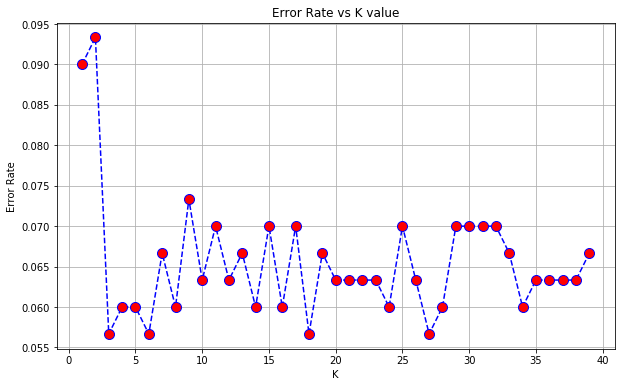

In [29]:
plt.figure(figsize =(10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle='dashed',marker = 'o',markerfacecolor ='red',markersize = 10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()


In [30]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


[[138  15]
 [ 12 135]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       153
           1       0.90      0.92      0.91       147

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# Retrain with new K Value

Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [31]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[137  16]
 [  3 144]]


              precision    recall  f1-score   support

           0       0.98      0.90      0.94       153
           1       0.90      0.98      0.94       147

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

